## First organize imports

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns

### Get main data for the movies

In [2]:
movie_data = pd.read_csv('raw data/movies_metadata.csv')

C:\Users\zacha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Clean data to get rid of NaNs, 0 values and useless columns, and fix data types

In [3]:
movie_data = movie_data.drop(['homepage', 'adult', 'tagline', 'video', 'belongs_to_collection', 'poster_path', 'status'], axis=1)

In [4]:
movie_data = movie_data[np.isfinite(movie_data['revenue'])]
movie_data = movie_data[np.isfinite(movie_data['runtime'])]

In [5]:
movie_data["budget"] = movie_data["budget"].astype(int)
movie_data["revenue"] = movie_data["revenue"].astype(int)
movie_data["id"] = movie_data["id"].astype(int)
movie_data["popularity"] = movie_data["popularity"].astype(float)
movie_data["title"] = movie_data["title"].astype(str)

### Create a new dataframe from the cleaned data to work with.

In [6]:
new_dataframe = movie_data

We'll only need to work with the date, revenue, budget popularity and title variables

In [7]:
new_dataframe = new_dataframe.drop(['spoken_languages', 'production_countries', 'production_companies', 'runtime', 'overview', 'original_title', 'original_language', 'id', 'imdb_id', 'genres'], axis=1)

Need to clean this dataframe so that it 1) only contains movies from 1996 onwards, 2) has a min budget of 1 and a max of 100,000,000 3) has a normaized revenue column that expresses the profit as a percentage of the budget.

In [8]:
new_dataframe["release_date"] = pd.to_datetime(new_dataframe.release_date)

new_dataframe['Year'] = new_dataframe.release_date.dt.year
new_dataframe['year_group'] = new_dataframe.release_date.map(lambda date: date.year//4*4)

valid_min_budget, valid_max_budget = 0, 100000000
is_valid_budget = (new_dataframe['budget'] > valid_min_budget)\
    & (new_dataframe['budget'] < valid_max_budget)
is_valid_year = (new_dataframe['Year'] >= 1996)

new_dataframe["net_profit_percentage"] = (new_dataframe["revenue"] - new_dataframe["budget"])/new_dataframe["budget"]
new_dataframe['film_profit'] = (new_dataframe['revenue'] - new_dataframe['budget'])

clean_dataframe = new_dataframe[is_valid_budget]
clean_dataframe = clean_dataframe[is_valid_year]

C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


   Going to experiment with high profit movies as movies in the top 10%, bottom 10% and middle 80% in terms of net_profit_percentage

In [9]:
#about 6127 movies in clean_dataframe 
high_profit_movies = clean_dataframe.sort_values(by='net_profit_percentage').tail(613)
low_profit_movies = clean_dataframe[clean_dataframe['net_profit_percentage'] < 0]
regular_profit_movies = clean_dataframe.sort_values(by='net_profit_percentage').head(5514)
regular_profit_movies = regular_profit_movies.sort_values(by='net_profit_percentage').tail(4901)
regular_profit_movies = regular_profit_movies[regular_profit_movies['net_profit_percentage'] >= 0]

In [10]:
regular_profit_movies.sort_values(by="film_profit").head(5)

,budget,popularity,release_date,revenue,title,vote_average,vote_count,Year,year_group,net_profit_percentage,film_profit
35086,1,2.240259,2015-12-04,1,The Letters,5.6,10.0,2015.0,2012.0,0.0,0
15689,823258,4.584117,2004-12-01,823258,Narco,6.1,43.0,2004.0,2004.0,0.0,0
40682,500,0.460016,2016-03-03,500,Musudan,5.5,3.0,2016.0,2016.0,0.0,0
15917,7,0.265854,2009-08-09,7,Bran Nue Dae,5.2,6.0,2009.0,2008.0,0.0,0
23552,500000,1.946823,2012-06-26,500000,Bikini Spring Break,3.8,20.0,2012.0,2012.0,0.0,0


In [34]:
high_profit_movies['profit_hierarchy'] = "Top 10%"
regular_profit_movies['profit_hierarchy'] = "No Loss"
low_profit_movies['profit_hierarchy'] = "Lost"

### 613 movies in high_profit dataframe, 1709 in regular_profit, 3805 in low_profit

One thing I've learned from working with this dataframe is that the vast majority of movies lose or make little money in comparison to the budget for the film. In my head I was aware that not every movie is guarenteed to become a huge blockbuster, but it was still surprising to see how many movies break even or even lose money through showing the film.

In [35]:
clean_dataframe = pd.concat([high_profit_movies, regular_profit_movies, low_profit_movies], ignore_index=True)

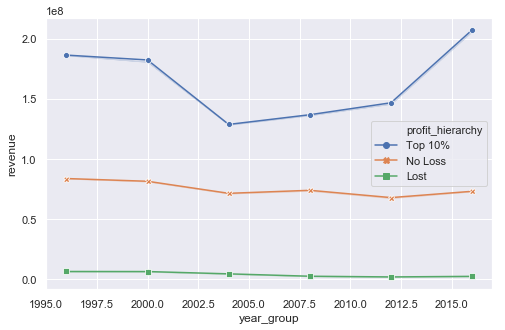

In [36]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize': (8, 5)})
g = sns.lineplot(x="year_group", y = "revenue", hue="profit_hierarchy",style="profit_hierarchy",ci=False, data=clean_dataframe, dashes=False, markers=True)

C:\Users\zacha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


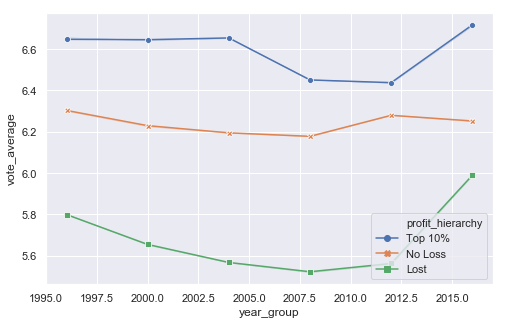

In [38]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize': (8, 5)})
g = sns.lineplot(x="year_group", y = "vote_average", hue="profit_hierarchy", style="profit_hierarchy", dashes=False, markers=True, data=clean_dataframe, ci=False)

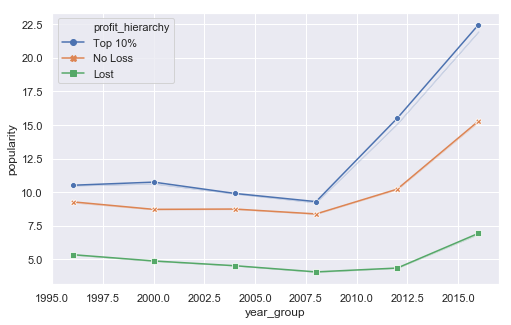

In [40]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize': (8, 5)})
g = sns.lineplot(x="year_group", y = "popularity", hue="profit_hierarchy", style="profit_hierarchy", dashes=False, markers=True, data=clean_dataframe, ci=False)

C:\Users\zacha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


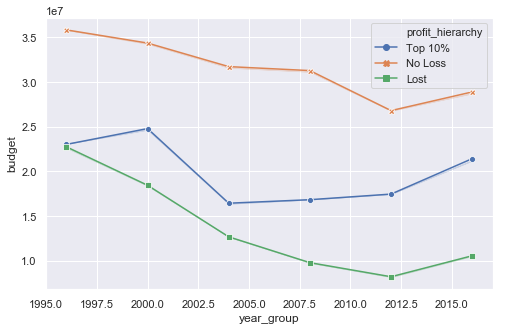

In [42]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize': (8, 5)})
g = sns.lineplot(x="year_group", y = "budget", hue="profit_hierarchy", style="profit_hierarchy", dashes=False, markers=True, data=clean_dataframe, ci=False)

Measuring exceptionally high profit films against ordinary profit films

Let's experiment a bit with the average film profit filtered by different min and max budgets

In [17]:
def mean_film_profit(year, min_budget, max_budget, dataframe):
    correct_budget = (dataframe['budget'] >= min_budget) & (dataframe['budget'] <= max_budget)
    correct_year = (dataframe['Year'] >= 1996)
    cleaned_dataframe = dataframe[correct_budget]
    cleaned_dataframe = cleaned_dataframe[correct_year]
    cleaned_dataframe['year_group'] = cleaned_dataframe['Year']//year*year
    cleaned_dataframe.groupby('year_group')['film_profit'].mean().plot()

C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


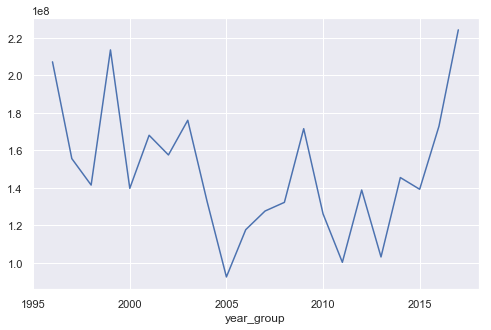

In [18]:
mean_film_profit(1, 100000, 1000000000, high_profit_movies)

C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


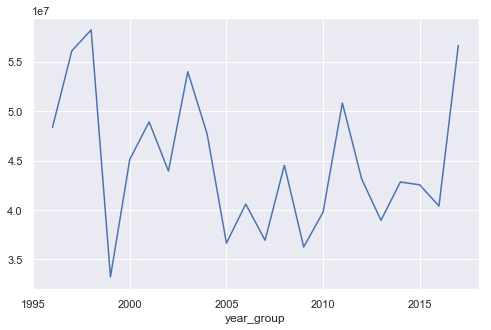

In [19]:
mean_film_profit(1, 100000, 1000000000, regular_profit_movies)

C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


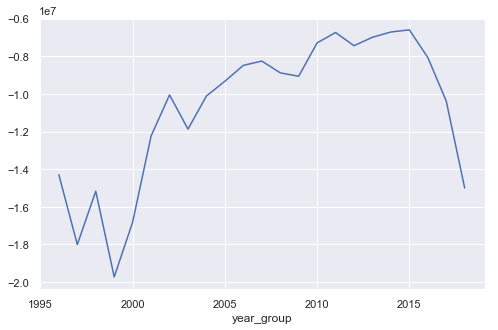

In [20]:
mean_film_profit(1, 100000, 1000000000, low_profit_movies)

C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


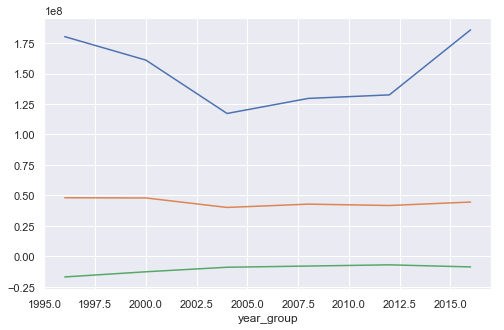

In [21]:
high = mean_film_profit(4, 100000, 1000000000, high_profit_movies)#1, 100000, 10000000
middle = mean_film_profit(4, 100000, 1000000000, regular_profit_movies)
low = mean_film_profit(4, 100000, 1000000000, low_profit_movies)

In [22]:
def mean_film_normalized_profit(year, min_budget, max_budget, dataframe):
    correct_budget = (dataframe['budget'] >= min_budget) & (dataframe['budget'] <= max_budget)
    correct_year = (dataframe['Year'] >= 1996)
    cleaned_dataframe = dataframe[correct_budget]
    cleaned_dataframe = cleaned_dataframe[correct_year]
    cleaned_dataframe['year_group'] = cleaned_dataframe['Year']//year*year
    cleaned_dataframe.groupby('year_group')['net_profit_percentage'].mean().plot()

C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


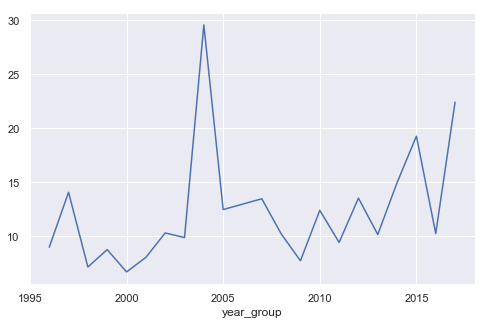

In [23]:
mean_film_normalized_profit(1, 100000, 1000000000, high_profit_movies)

C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


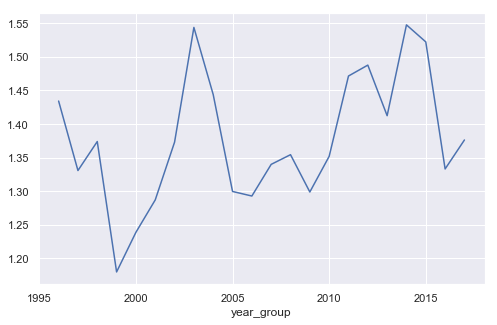

In [24]:
mean_film_normalized_profit(1, 100000, 1000000000, regular_profit_movies)

C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


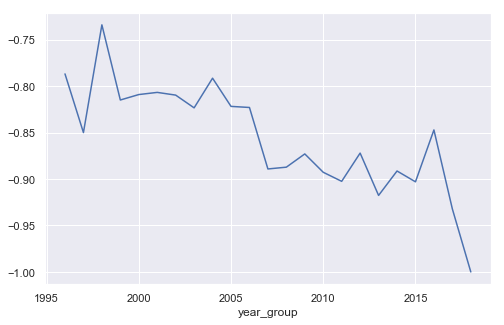

In [25]:
mean_film_normalized_profit(1, 100000, 1000000000, low_profit_movies)

C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


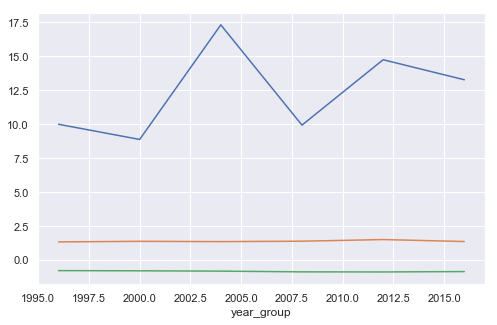

In [26]:
a = mean_film_normalized_profit(4, 100000, 1000000000, high_profit_movies)
b = mean_film_normalized_profit(4, 100000, 1000000000, regular_profit_movies)
c = mean_film_normalized_profit(4, 100000, 1000000000, low_profit_movies)

The Blair Witch Project is significant, it was a horror, with a budget of 60,000 and a revenue of 248,000,000, made in 1999, popularity 14.84
Spirited away was significant, budget of 15 million, revenue of ~275 million, popularity of 41, came out 2001
Tarnation was significant, budget 218, revenue, 1.1 million, popularity 1.6, year 2003

In [27]:
year_range = 4
(clean_dataframe['Year']//year_range*year_range).sample(10)

922     2000.0
4613    2008.0
5920    2016.0
3868    2008.0
718     2008.0
2963    1996.0
6091    2008.0
635     1996.0
5826    2016.0
3301    2004.0
Name: Year, dtype: float64

In [28]:
clean_dataframe['year_group'] = clean_dataframe['Year']//year_range*year_range

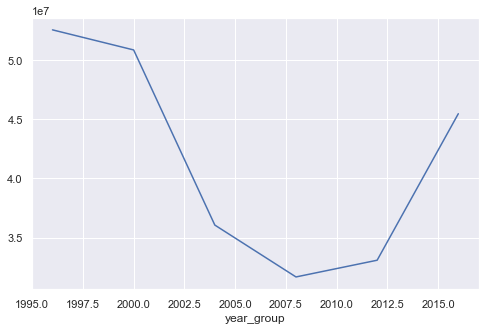

In [29]:
clean_dataframe.groupby('year_group')['revenue'].mean().plot()

### This is a good visualization of the middle profits group, where the movies have made less than the top 10% but their net_percentage_profit is greater than or equal to 0.

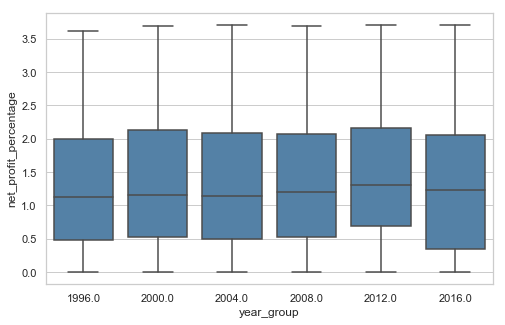

In [30]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="year_group", y="net_profit_percentage", data=regular_profit_movies, color="steelblue")